 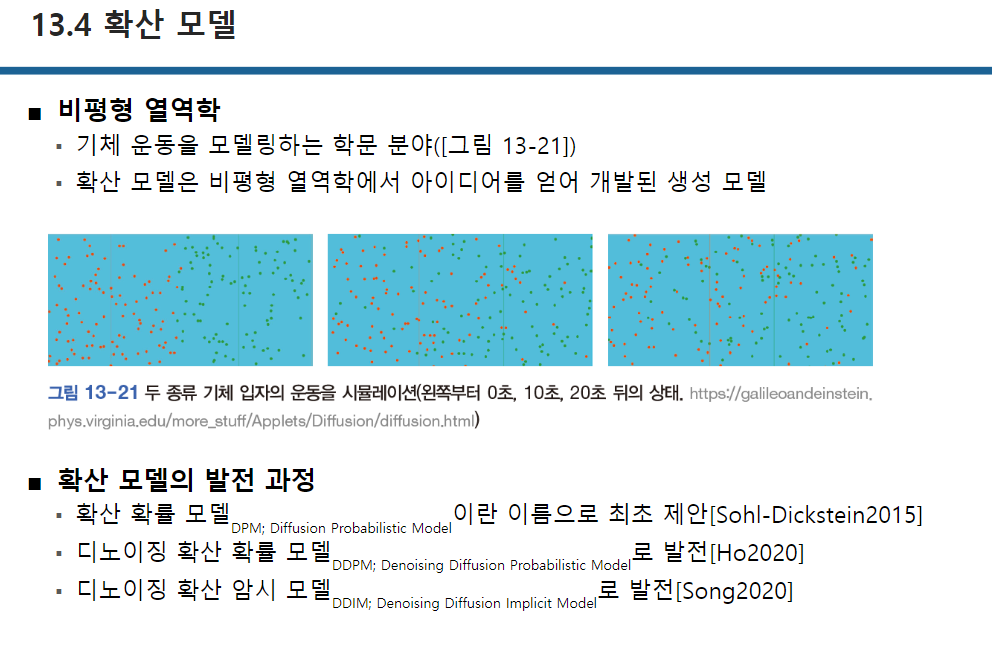

 2020년 확산(diffusion) 모델 논문 발표

이 논문은 이전 연구들을 바탕으로 확산모델과 점수 기반 생성 모델 사이의 깊은 연관성을 밝혀냈다

GAN에 필적할 만한 확산모델인 잡음제거확산확률모델을 훈련시킴(Denoising Diffusion Probabilistic Model, DDMP)

아이디어는 연속해서 매우 조금씩 이미지에서 잡음을 제거하도록 딥러닝을 훈련시키는 것

완전히 랜덤한 잡음에서 시작한다면 이론적으로는 훈련세트에서 가져온 것처럼 보이는 이미지를 얻을 때까지 모델을 계속 적용
할 수 있어야 함

정방향(잡음 추가)

역방향(잡음 제거) 확산과정

In [1]:
import sys

# 코랩의 경우 깃허브 저장소로부터 utils.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/Generative_Deep_Learning_2nd_Edition/main/notebooks/utils.py
    !mkdir -p notebooks
    !mv utils.py notebooks
    # output 디렉토리를 만듭니다.
    !mkdir output
    !mkdir models
else:
    sys.path.append('../../../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('colorblind')

import math

import tensorflow as tf
from tensorflow.python.keras import (
    layers,
    models,
    optimizers,
    utils,
    callbacks,
    metrics,
    losses,
    activations,
)

from notebooks.utils import display, sample_batch

In [4]:
IMAGE_SIZE = 64
BATCH_SIZE = 64
DATASET_REPETITIONS = 5
LOAD_MODEL = False

NOISE_EMBEDDING_SIZE = 32
PLOT_DIFFUSION_STEPS = 20

# 최적화
EMA = 0.999
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-4
EPOCHS = 50

In [ ]:
# 코랩일 경우 노트북에서 celeba 데이터셋을 받습니다.
if 'google.colab' in sys.modules:
    # 캐글-->Setttings-->API-->Create New Token에서
    # kaggle.json 파일을 만들어 코랩에 업로드하세요.
    from google.colab import files
    files.upload()
    !mkdir ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    # celeba 데이터셋을 다운로드하고 압축을 해제합니다.
    !kaggle datasets download -d nunenuh/pytorch-challange-flower-dataset
    !unzip -q pytorch-challange-flower-dataset.zip
    # output 디렉토리를 만듭니다.
    !mkdir output